In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = np.loadtxt("student_clustering.csv", delimiter = ",", skiprows = 1)
X=data[:,:]

In [42]:
X

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [43]:
def initialize_centroids(X,k):
    
    # Randomly pick k data points as initial centroids.
    np.random.seed(42)
    random_indices=np.random.choice(X.shape[0],k,replace=False)
    centroids=X[random_indices]
    return centroids

In [50]:
def compute_distance(X,centroids):
    # Compute distance of each point in X from each centroid.
    #Returns a matrix of shape (n_samples, k).
    diff=X[:,np.newaxis]-centroids
    squared_diff=diff**2
    sum=np.sum(squared_diff,axis=2)
    distances=np.sqrt(sum)
    return distances

In [45]:
def assign_clusters(distances):
    labels=np.argmin(distances,axis=1)
    return labels

In [51]:
def update_centroids(X,labels,k):
    new_centroids=np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [47]:
def kmeans(X,k,itr=100,tol=1e-4):
    centroids=initialize_centroids(X,k)
    for i in range(itr):
        old_centroids=centroids.copy()
        distances=compute_distance(X,centroids)
        labels=assign_clusters(distances)
        centroids=update_centroids(X,labels,k)

        diff = centroids - old_centroids
        total_movement = np.sqrt(np.sum(diff ** 2))

        # Stop if centroids have not moved much
        if(total_movement<tol):
            print(f"Converged after {i+1} iterations.")
            break
        else:
            print("Reached max iterations without convergence.")
    return centroids,labels

In [52]:
def plot_clusters(X, labels, centroids):
    plt.figure(figsize=(8,6))
    k = centroids.shape[0]

    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title("K-Means Clustering (2D Data)")
    plt.xlabel("CGPA")
    plt.ylabel("IQ")
    plt.legend()
    plt.show()


Reached max iterations without convergence.
Reached max iterations without convergence.
Reached max iterations without convergence.
Converged after 4 iterations.


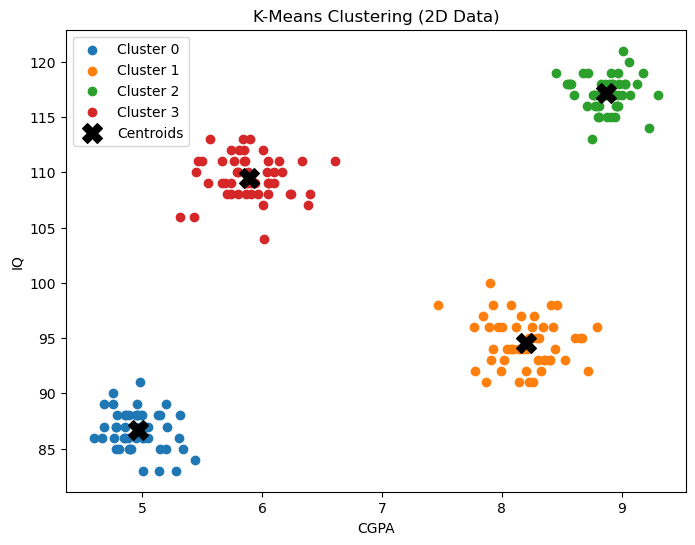

In [55]:
k = 4
centroids, labels = kmeans(X, k)
plot_clusters(X, labels, centroids)